In [179]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Project dedicated to check if education level has influence on the healthy life expectancy. Based on the data from Eurostat database. 
First step: examine correlation between education level, BMI and fruit&vegetables intake.
Second step: examine additional factors: tobbaco, alcohol and PKB per capita.

In [180]:
bmi= pd.read_csv('bmi/hlth_ehis_bm1e_1_Data.csv')

In [181]:
bmi.head()

,BMI,GEO,UNIT,TIME,ISCED11,SEX,AGE,Value,Flag and Footnotes
0,Underweight,European Union - 27 countries (from 2020),Percentage,2014,"Less than primary, primary and lower secondary...",Males,Total,2.9,NaN
1,Underweight,European Union - 27 countries (from 2020),Percentage,2014,"Less than primary, primary and lower secondary...",Females,Total,4.5,NaN
2,Underweight,European Union - 27 countries (from 2020),Percentage,2014,Upper secondary and post-secondary non-tertiar...,Males,Total,1.0,NaN
3,Underweight,European Union - 27 countries (from 2020),Percentage,2014,Upper secondary and post-secondary non-tertiar...,Females,Total,3.8,NaN
4,Underweight,European Union - 27 countries (from 2020),Percentage,2014,Tertiary education (levels 5-8),Males,Total,0.6,NaN


In [182]:
bmi.columns

Index(['BMI', 'GEO', 'UNIT', 'TIME', 'ISCED11', 'SEX', 'AGE', 'Value',
       'Flag and Footnotes'],
      dtype='object')

In [183]:
bmi['BMI'].unique()

array(['Underweight', 'Normal', 'Overweight'], dtype=object)

In [184]:
bmi['GEO'].unique()

array(['European Union - 27 countries (from 2020)',
       'European Union - 28 countries (2013-2020)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'United Kingdom', 'Serbia', 'Turkey'], dtype=object)

In [185]:
bmi.describe(include = ['O'])

,BMI,GEO,UNIT,ISCED11,SEX,AGE,Value
count,1224,1224,1224,1224,1224,1224,1224
unique,3,34,1,3,2,1,421
top,Underweight,European Union - 27 countries (from 2020),Percentage,"Less than primary, primary and lower secondary...",Males,Total,:
freq,408,36,1224,408,612,1224,54


First conclusions: data frame contains 1224 records. There are 3 BMI values: Underweight, Normal and Overweigth. Data covers 34 countries (including collected information for the EU), 3 education levels, provides differentiation between man and women, but not the age. Therefore the column: AGE can also be removed.

bmi data cleaning: 
- remove columns: UNIT, AGE< Flag and Footnotes, as they contain information not relevant for the analysis
- check for missing data and either remove or fill. No missing values except column: Flag and Footnotes.
- as the analysis will be done per country, data for the whole EU can be removed
- remove data from 2014

<AxesSubplot:>

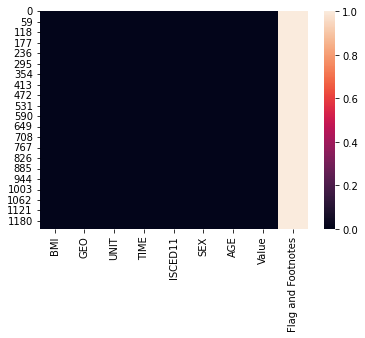

In [186]:
sns.heatmap(bmi.isnull())

In [187]:
bmi.drop('UNIT', axis=1, inplace=True)

In [188]:
bmi.drop('Flag and Footnotes', axis = 1, inplace=True)

In [189]:
bmi.drop('AGE', axis = 1, inplace = True)

In [190]:
countries = bmi['GEO'].unique().tolist()[2:]

In [191]:
bmi_single_countries = bmi[bmi['GEO'].isin(countries)].copy()
bmi_single_countries

,BMI,GEO,TIME,ISCED11,SEX,Value
24,Underweight,Belgium,2014,"Less than primary, primary and lower secondary...",Males,4.8
25,Underweight,Belgium,2014,"Less than primary, primary and lower secondary...",Females,4.7
26,Underweight,Belgium,2014,Upper secondary and post-secondary non-tertiar...,Males,1.3
27,Underweight,Belgium,2014,Upper secondary and post-secondary non-tertiar...,Females,3.3
28,Underweight,Belgium,2014,Tertiary education (levels 5-8),Males,0.7
...,...,...,...,...,...,...
1219,Overweight,Turkey,2019,"Less than primary, primary and lower secondary...",Females,67.9
1220,Overweight,Turkey,2019,Upper secondary and post-secondary non-tertiar...,Males,52.0
1221,Overweight,Turkey,2019,Upper secondary and post-secondary non-tertiar...,Females,39.7
1222,Overweight,Turkey,2019,Tertiary education (levels 5-8),Males,59.4


In [192]:
bmi_2019 = bmi_single_countries[bmi_single_countries['TIME'] == 2019].copy()
bmi_2019

,BMI,GEO,TIME,ISCED11,SEX,Value
30,Underweight,Belgium,2019,"Less than primary, primary and lower secondary...",Males,3.2
31,Underweight,Belgium,2019,"Less than primary, primary and lower secondary...",Females,5.3
32,Underweight,Belgium,2019,Upper secondary and post-secondary non-tertiar...,Males,1.4
33,Underweight,Belgium,2019,Upper secondary and post-secondary non-tertiar...,Females,3.3
34,Underweight,Belgium,2019,Tertiary education (levels 5-8),Males,0.9
...,...,...,...,...,...,...
1219,Overweight,Turkey,2019,"Less than primary, primary and lower secondary...",Females,67.9
1220,Overweight,Turkey,2019,Upper secondary and post-secondary non-tertiar...,Males,52.0
1221,Overweight,Turkey,2019,Upper secondary and post-secondary non-tertiar...,Females,39.7
1222,Overweight,Turkey,2019,Tertiary education (levels 5-8),Males,59.4


In [193]:
def change_to_number(x):
    if x == ':':
        return 0
    else:
        return float(x)

bmi_2019['Value'] = bmi_2019['Value'].apply(lambda x: change_to_number(x))

In [217]:
education_descriptions = bmi_2019['ISCED11'].unique().tolist()
education_numbered = [1,2,3]
education_dict = {name:number for name,number in zip(education_descriptions, education_numbered)}
education_dict

{'Less than primary, primary and lower secondary education (levels 0-2)': 1,
 'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)': 2,
 'Tertiary education (levels 5-8)': 3}

In [218]:
bmi_2019['education_numeric'] = bmi_2019['ISCED11'].map(education_dict)

In [219]:
bmi_2019

,BMI,GEO,TIME,ISCED11,SEX,Value,education_numeric
30,Underweight,Belgium,2019,"Less than primary, primary and lower secondary...",Males,3.2,1
31,Underweight,Belgium,2019,"Less than primary, primary and lower secondary...",Females,5.3,1
32,Underweight,Belgium,2019,Upper secondary and post-secondary non-tertiar...,Males,1.4,2
33,Underweight,Belgium,2019,Upper secondary and post-secondary non-tertiar...,Females,3.3,2
34,Underweight,Belgium,2019,Tertiary education (levels 5-8),Males,0.9,3
...,...,...,...,...,...,...,...
1219,Overweight,Turkey,2019,"Less than primary, primary and lower secondary...",Females,67.9,1
1220,Overweight,Turkey,2019,Upper secondary and post-secondary non-tertiar...,Males,52.0,2
1221,Overweight,Turkey,2019,Upper secondary and post-secondary non-tertiar...,Females,39.7,2
1222,Overweight,Turkey,2019,Tertiary education (levels 5-8),Males,59.4,3


In [210]:
pivot_bmi = bmi_2019.pivot_table(values = 'Value', index = 'GEO', columns = ['ISCED11', 'BMI'])

In [211]:
pivot_bmi

ISCED11                                          Less than primary, primary and lower secondary education (levels 0-2)  \
BMI                                                                                                             Normal   
GEO                                                                                                                      
Austria                                                                                       40.05                      
Belgium                                                                                       42.20                      
Bulgaria                                                                                      45.00                      
Croatia                                                                                       28.60                      
Cyprus                                                                                        40.05                      
Czechia                                                                                       50.55                      
Denmark                                                                                       49.05                      
Estonia                                                                                       49.00                      
Finland                                                                                       38.30                      
France                                                                                        43.30                      
Germany (until 1990 former territory of the FRG)                                              44.95                      
Greece                                                                                        34.65                      
Hungary                                                                                       40.55                      
Iceland                                                                                       37.10                      
Ireland                                                                                       18.95                      
Italy                                                                                         44.85                      
Latvia                                                                                        48.40                      
Lithuania                                                                                     52.25                      
Luxembourg                                                                                    42.20                      
Malta                                                                                         27.55                      
Netherlands                                                                                   43.25                      
Norway                                                                                        48.10                      
Poland                                                                                        45.05                      
Portugal                                                                                      35.25                      
Romania                                                                                       45.45                      
Serbia                                                                                        43.05                      
Slovakia                                                                                      43.80                      
Slovenia                                                                                      39.15                      
Spain                                                                                         37.45                      
Sweden                                                                                        44

In [212]:
pivot_bmi.describe()

ISCED11 Less than primary, primary and lower secondary education (levels 0-2)  \
BMI                                                                    Normal   
count                                            32.000000                      
mean                                             39.887500                      
std                                              10.159867                      
min                                               0.000000                      
25%                                              37.362500                      
50%                                              42.625000                      
75%                                              45.012500                      
max                                              52.250000                      

ISCED11                        Tertiary education (levels 5-8)             \
BMI     Overweight Underweight                          Normal Overweight   
count    32.000000   32.000000                       32.000000  32.000000   
mean     52.935938    4.054688                       47.703125  46.662500   
std      11.796803    3.387890                       10.707428  10.448622   
min       0.000000    0.000000                        0.000000   0.000000   
25%      49.850000    2.487500                       44.112500  43.775000   
50%      52.900000    3.600000                       49.125000  47.800000   
75%      58.787500    4.775000                       53.650000  52.000000   
max      70.800000   20.950000                       59.450000  59.000000   

ISCED11              \
BMI     Underweight   
count     32.000000   
mean       2.507812   
std        2.596527   
min        0.000000   
25%        1.475000   
50%        1.875000   
75%        2.800000   
max       15.550000   

ISCED11 Upper secondary and post-secondary non-tertiary education (levels 3 and 4)  \
BMI                                                                         Normal   
count                                            32.000000                           
mean                                             40.571875                           
std                                               9.730107                           
min                                               0.000000                           
25%                                              36.625000                           
50%                                              42.150000                           
75%                                              45.325000                           
max                                              56.700000                           

ISCED11                         
BMI     Overweight Underweight  
count    32.000000   32.000000  
mean     53.637500    2.664062  
std      11.838374    3.059418  
min       0.000000    0.000000  
25%      50.600000    1.587500  
50%      55.175000    1.950000  
75%      61.075000    2.475000  
max      66.050000   17.850000

Conclusion: Based on data from all EU countries, in the group with highest education the mean % of overweight citizens is > 6 %points lower than in the groups with education levels 0-2 and 3-4. 

In [6]:
fv_consumption = pd.read_csv('fruit_vegetables/hlth_ehis_fv3e_1_Data.csv')

In [7]:
fv_consumption

,N_PORTION,GEO,UNIT,TIME,ISCED11,SEX,AGE,Value,Flag and Footnotes
0,0 portions,European Union - 27 countries (from 2020),Percentage,2014,"Less than primary, primary and lower secondary...",Males,Total,39.1,NaN
1,0 portions,European Union - 27 countries (from 2020),Percentage,2014,"Less than primary, primary and lower secondary...",Females,Total,30.5,NaN
2,0 portions,European Union - 27 countries (from 2020),Percentage,2014,Upper secondary and post-secondary non-tertiar...,Males,Total,45.9,NaN
3,0 portions,European Union - 27 countries (from 2020),Percentage,2014,Upper secondary and post-secondary non-tertiar...,Females,Total,33.8,NaN
4,0 portions,European Union - 27 countries (from 2020),Percentage,2014,Tertiary education (levels 5-8),Males,Total,38.8,NaN
...,...,...,...,...,...,...,...,...,...
1219,5 portions or more,Turkey,Percentage,2019,"Less than primary, primary and lower secondary...",Females,Total,3.3,NaN
1220,5 portions or more,Turkey,Percentage,2019,Upper secondary and post-secondary non-tertiar...,Males,Total,2.5,NaN
1221,5 portions or more,Turkey,Percentage,2019,Upper secondary and post-secondary non-tertiar...,Females,Total,2.6,NaN
1222,5 portions or more,Turkey,Percentage,2019,Tertiary education (levels 5-8),Males,Total,2.1,NaN


In [8]:
life_expectancy = pd.read_csv('hlth_silc_17/hlth_silc_17_1_Data.csv')

In [9]:
life_expectancy.sample(25)

,TIME,GEO,INDIC_HE,SEX,UNIT,Value,Flag and Footnotes
185,2019,Iceland,Health expectancy in absolute values at 65,Females,Year,:,NaN
175,2019,Sweden,Health expectancy in absolute values at birth,Females,Year,80.2,NaN
69,2019,Spain,Health expectancy in absolute values at 50,Females,Year,31.3,NaN
103,2019,Lithuania,Health expectancy in absolute values at birth,Females,Year,70.5,NaN
99,2019,Latvia,Health expectancy in absolute values at 50,Females,Year,23.1,NaN
177,2019,Sweden,Health expectancy in absolute values at 50,Females,Year,32.6,NaN
33,2019,Czechia,Health expectancy in absolute values at 50,Females,Year,27.2,NaN
146,2019,Portugal,Health expectancy in absolute values at 50,Males,Year,23.7,NaN
164,2019,Slovakia,Health expectancy in absolute values at 50,Males,Year,20.2,NaN
12,2019,European Union - 27 countries (2007-2013),Health expectancy in absolute values at birth,Males,Year,:,NaN
